## Compute FHT in Harmonic Oscillator 

Here we define the probability that the particle will reach $x_{r}$ at time $t$ under the evolution of the Liouvillian given by 
\begin{equation}
    P(x_{r}, t|x_{0}=0, t_{0}) = {\rm Tr}\left[|x_{r}\rangle \langle x_{r}| e^{\mathcal{L}t} \rho_{0}\right]\,,
\end{equation}
where the system is continuously measured via Homodyne detection. 
The probability that it is between $-{x_{r}} \leq x \leq x_{r}$ at any given time $t$ is then given by 
\begin{equation}
     P(-x_{r} \leq x \leq x_{r}, t) = \int_{-x_{r}}^{x_{r}} dx P(x, t|x_{0}=0, t_{0})\.
\end{equation}
Given that this is a Markov process, the probability that it is still in this region after $T$ is then given by 
\begin{equation}
    P(-x_{r} \leq x \leq x_{r}, T) = \prod
\end{equation}

In [1349]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({'font.size': 24})

In [1495]:
N = 30

a = destroy(N)
x = a + a.dag()
k = 1
w = 1

H = w*a.dag()*a
c_ops = [np.sqrt(k)*x, a]

rho0 = steadystate(H, c_ops)
rho0 = fock_dm(N,0)
rho0vec = operator_to_vector(rho0)

ℒ = liouvillian(H, c_ops)

dt = 0.1
tf = 8
t = np.arange(0, tf, dt) 

# Create projetors
eigs  = x.eigenenergies()
eigst = x.eigenstates()[1]

In [1496]:
eigs[0]

-9.706235997359508

In [1497]:
np.mean(eigst[0])

(-0.0016062656827967499+0j)

In [1498]:
xmin = 1.5

# Find closest x val to min
xr = np.abs(eigs[np.argmin(np.abs(eigs - xmin))])

In [1499]:
# Simulat unconditional dynamics
result = mesolve(H, rho0, t, c_ops=c_ops)

In [1500]:
Pxt = np.array([[expect(ket2dm(eg), rhoi) for eg in eigst] for rhoi in result.states])

xbounds =  eigs[(eigs>=-(xr+0.001))&(eigs<=(xr+0.001))]
Pxbounds = np.array([Pxti[(eigs>-xr)&(eigs<xr)]for Pxti in Pxt])

Pt = np.sum(Pxbounds, axis=1)

In [1501]:
np.shape(Pt)

(80,)

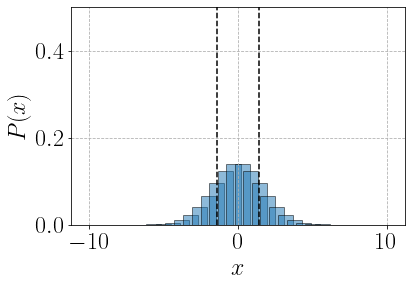

In [1502]:
plt.bar(eigs, Pxt[-1], width=1, edgecolor='k', alpha=0.5)
plt.vlines(-xr, 0, 1, color='k', linestyle='--')
plt.vlines(xr, 0, 1, color='k', linestyle='--')

plt.ylim([0,0.5])
plt.grid(True, linestyle='--')
plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')

plt.show()

In [1503]:
np.max(Pxt[-1])

# np.sum(Pt)*dt

0.138628206999725

In [1504]:
# Compute first passage time
Tm = np.sum(np.cumprod(Pt))*dt
Tm

0.4345721828871625

[]

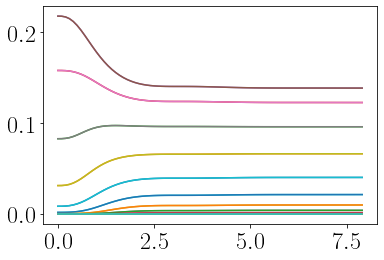

In [1508]:
plt.plot(t, Pxt)

plt.plot()

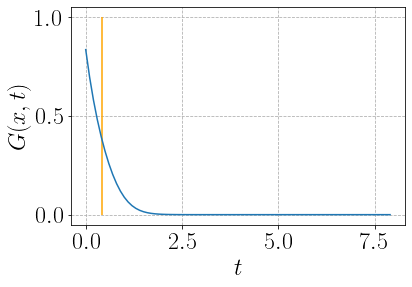

In [1510]:
plt.plot(t, np.cumprod(Pt))
plt.vlines(Tm, 0, 1, color='orange')
plt.grid(True, linestyle='--')

plt.xlabel(r'$t$')
plt.ylabel(r'$G(x,t)$')

plt.show()

In [1523]:
# Compute the same but sample from trajectories
N_s = 10
a_s = destroy(N_s)
x_s = a_s + a_s.dag()

H_s = w*a_s.dag()*a_s
c_ops_s = [np.sqrt(k)*x_s, a_s]

# rho0_s = steadystate(H_s, c_ops_s)
rho0_s = fock_dm(N_s,0)
rho0vec_s = operator_to_vector(rho0_s)

ℒ_s = liouvillian(H_s, c_ops_s)

dt = 0.1
tf = 8
t = np.arange(0, tf, dt) 

# Create projetors
eigs_s  = x_s.eigenenergies()
eigst_s = x_s.eigenstates()[1]

In [1524]:
dts = 0.005
tf = 8
ts = np.arange(0, tf, dts) 


In [1525]:
results = smesolve(H_s, rho0_s, ts, sc_ops=c_ops_s, e_ops=[x_s], ntraj=1000, store_all_expect=True)

10.0%. Run time:   4.44s. Est. time left: 00:00:00:39
20.0%. Run time:   8.86s. Est. time left: 00:00:00:35
30.0%. Run time:  13.29s. Est. time left: 00:00:00:31
40.0%. Run time:  17.70s. Est. time left: 00:00:00:26
50.0%. Run time:  22.10s. Est. time left: 00:00:00:22
60.0%. Run time:  26.50s. Est. time left: 00:00:00:17
70.0%. Run time:  30.91s. Est. time left: 00:00:00:13
80.0%. Run time:  35.31s. Est. time left: 00:00:00:08
90.0%. Run time:  39.71s. Est. time left: 00:00:00:04
Total run time:  44.13s


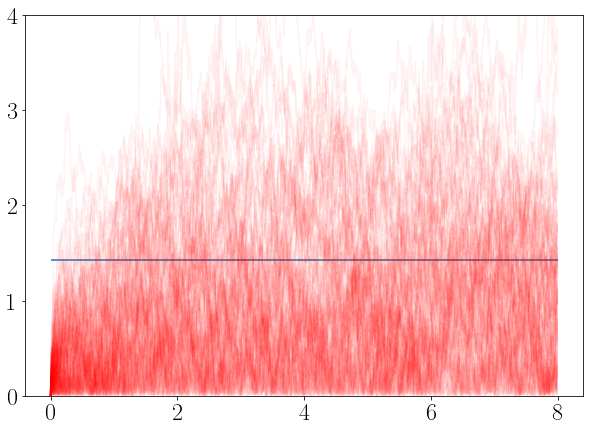

In [1526]:
xes = np.real(results.runs_expect)[:,0,:]

fig = plt.figure(figsize=(10,7))
plt.plot(ts, np.abs(xes[:100].T), color='r', alpha=0.05)

plt.ylim([0,4])

plt.hlines(-xr, 0, tf)
plt.hlines(xr, 0, tf)

plt.show()

In [1534]:
def catch(xei):
    
    # Catch instances where min isn't met
    
    try:
        return np.min(np.where(np.abs(xei)>=xr))
    except ValueError:
        return -1
    
itemindex = np.array([catch(xei) for xei in xes])
inds = itemindex[itemindex != -1]



In [1535]:
# xesf = np.delete(xes, drps, axis=0)

In [1536]:
tinds = ts[inds]
Tms = np.mean(tinds)

In [1537]:
np.var(tinds)/np.sqrt(2000)

0.02711562485680863

In [1538]:
Tm

0.4345721828871625

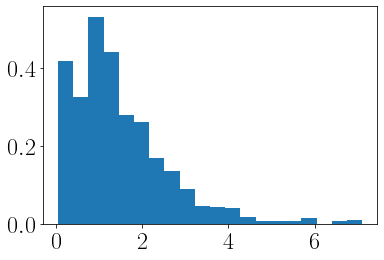

In [1539]:
plt.hist(tinds, bins=20, density=True)

plt.show()


In [1540]:
Tms

1.4573446893787574

In [1541]:
np.pi*xr**2/2

3.194201980489011